# Tugas 5 : Keyword Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/data_berita_detik.csv")
df.head()

,judul,tanggal,isi,kategori
0,Awal Mula J&J Digugat Rp 233 Miliar Buntut Kas...,"Rabu, 16 Okt 2024 15:03 WIB",Jakarta - Seorang pria bernama Evan Plotkin di...,Kesehatan
1,XLIFE Hadirkan Jasa Terapis Pijat Profesional ...,"Rabu, 16 Okt 2024 14:32 WIB",Jakarta - Manfaat dari terapi pijat selain rel...,Kesehatan
2,"Eks PM Malaysia Mahathir Mohamad Masuk RS, Sak...","Rabu, 16 Okt 2024 14:31 WIB",Jakarta - Mantan Perdana Menteri Malaysia Tun ...,Kesehatan
3,Aksi Nyeleneh Ritual Miliarder AS Ganti Plasma...,"Rabu, 16 Okt 2024 14:01 WIB","Jakarta - Miliarder Amerika Serikat, Bryan Joh...",Kesehatan
4,"Uji Klinis di RI Makin Turun Tiap Tahun, Kalah...","Rabu, 16 Okt 2024 13:30 WIB",Jakarta - Dirjen Kefarmasian dan Alat Kesehata...,Kesehatan


In [ ]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[6]
print(sample_berita)


Jakarta - Sejatinya, manusia butuh gula (glukosa) untuk hidup. Namun, kita tak memerlukan gula tambahan. Gul alami ditemukan pada buah dan susu, dengan bentuk fruktosa dan laktosa. Menurut World Health Organization (WHO), tidak ada bukti yang dilaporkan atas efek samping dari mengkonsumsi gula tersebut. Karena buah dan sayuran juga mengandung serat, mineral dan vitamin. Sementara di sisi lain, gula tambahan tidak memberikan manfaat gizi dan bisa menyebabkan penambahan berat badan hingga obesitas. Gula tambahan seringnya dimasukkan selama pemrosesan/persiapaan minuman dan makanan, yang bisa menyebabkan masalah kesehatan. Namun, banyak orang suka makan manis sampai kecanduan makanan manis. Di sisi lain, mengurangi asupan gula juga bisa menjadi langkah positif untuk meningkatkan kesehatan secara keseluruhan. Alasan Sulit Berhenti Makan Manis Alasan sulit berhenti makan manis bisa berkaitan dengan selera serta dipengaruhi faktor fisiologis dan psikologis. Berikut adalah alasan kenapa selal

memisahkan per kalimat


---




In [ ]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df


,kalimat ke n,kalimat
0,Kalimat ke 1,"Jakarta - Sejatinya, manusia butuh gula (gluko..."
1,Kalimat ke 2,"Namun, kita tak memerlukan gula tambahan"
2,Kalimat ke 3,"Gul alami ditemukan pada buah dan susu, dengan..."
3,Kalimat ke 4,"Menurut World Health Organization (WHO), tidak..."
4,Kalimat ke 5,"Karena buah dan sayuran juga mengandung serat,..."
...,...,...
57,Kalimat ke 58,"Contohnya, madu, sirup jagung, malt, sorbitol,..."
58,Kalimat ke 59,Di label akan mencantumkan persentase nilai ha...
59,Kalimat ke 60,%DV didasarkan atas batas 50 g gula tambahan s...
60,Kalimat ke 61,Makanan dengan 20%DV atau lebih itu sudah dian...


pre processing


---



In [ ]:
!pip install Sastrawi

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt


# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,kalimat ke n,final
0,Kalimat ke 1,jakarta sejati manusia butuh gula glukosa hidup
1,Kalimat ke 2,gula tambah
2,Kalimat ke 3,gul alami temu buah susu bentuk fruktosa laktosa
3,Kalimat ke 4,world health organization who bukti lapor efek...
4,Kalimat ke 5,buah sayur kandung serat mineral vitamin
...,...,...
57,Kalimat ke 58,contoh madu sirup jagung malt sorbitol fruktosa
58,Kalimat ke 59,label cantum persentase nilai hari dv gula tambah
59,Kalimat ke 60,dv dasar batas g gula tambah
60,Kalimat ke 61,makan dv anggap sumber gula tambah


TF-IDF


---

menghitung skor **TF-IDF (Term Frequency-Inverse Document Frequency)** dari setiap kata dalam kalimat yang telah diproses untuk menilai seberapa penting kata-kata tersebut dalam konteks kalimat. Pertama, kalimat-kalimat digabung menjadi dokumen, kemudian TF-IDF diterapkan untuk menghasilkan matriks yang menunjukkan skor setiap kata dalam setiap kalimat. Nama-nama kata (fitur) diambil dan hasil TF-IDF ini diubah menjadi tabel agar lebih mudah dianalisis. Selanjutnya, ditambahkan kolom identifikasi untuk setiap kalimat, dan akhirnya tabel tersebut ditampilkan dengan menampilkan skor TF-IDF dari kata-kata di setiap kalimat.

In [ ]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,ahli,alami,alas,alir,american,angela,anggap,as,association,...,tulis,turun,tutup,ulang,urai,utama,vitamin,wanita,who,world
0,Kalimat ke 1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,Kalimat ke 2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,Kalimat ke 3,0.0,0.350356,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,Kalimat ke 4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.346892,0.346892
4,Kalimat ke 5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.449845,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Kalimat ke 58,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
58,Kalimat ke 59,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
59,Kalimat ke 60,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
60,Kalimat ke 61,0.0,0.000000,0.0,0.0,0.0,0.0,0.562245,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [ ]:
# Transpose TF-IDF matrix untuk menghitung kemiripan antar kata
cosine_sim = cosine_similarity(tfidf_matrix.T)

# Mengonversi hasil cosine similarity menjadi DataFrame
df_cosine_sim = pd.DataFrame(cosine_sim, index=feature_names, columns=feature_names)

# Tampilkan hasil cosine similarity antar kata
df_cosine_sim

,ahli,alami,alas,alir,american,angela,anggap,as,association,asupan,...,tulis,turun,tutup,ulang,urai,utama,vitamin,wanita,who,world
ahli,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alami,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alas,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alir,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
american,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
vitamin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
wanita,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
who,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# Tentukan threshold untuk adjacency matrix (misalnya 0.5)
threshold = 0.5

# Membuat matriks adjacency berdasarkan threshold cosine similarity
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Mengonversi matriks adjacency menjadi DataFrame
adjacency_df = pd.DataFrame(adjacency_matrix, index=feature_names, columns=feature_names)

# Tampilkan matriks adjacency
adjacency_df

,ahli,alami,alas,alir,american,angela,anggap,as,association,asupan,...,tulis,turun,tutup,ulang,urai,utama,vitamin,wanita,who,world
ahli,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
alami,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alas,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alir,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
american,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
utama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
vitamin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
wanita,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
who,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Relabel node dengan nama kata-kata
mapping = {i: feature_names[i] for i in range(len(feature_names))}
G = nx.relabel_nodes(G, mapping)

# Menghitung Degree Centrality
degree_centrality = nx.degree_centrality(G)


# Membuat DataFrame untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kata': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
})

# Urutkan dataframe berdasarkan Degree Centrality, Closeness Centrality, dan Betweenness Centrality
degree_sorted = centrality_df.sort_values(by='Degree Centrality', ascending=False).head()
print("\nTop 10 Degree Centrality:")

top = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)
top


Top 10 Degree Centrality:


,Kata,Degree Centrality
59,gizi,0.085202
0,ahli,0.062780
108,lapar,0.062780
15,banding,0.062780
114,lisa,0.062780
22,besar,0.062780
44,diet,0.062780
207,the,0.062780
209,timbul,0.062780
139,obatobatan,0.062780


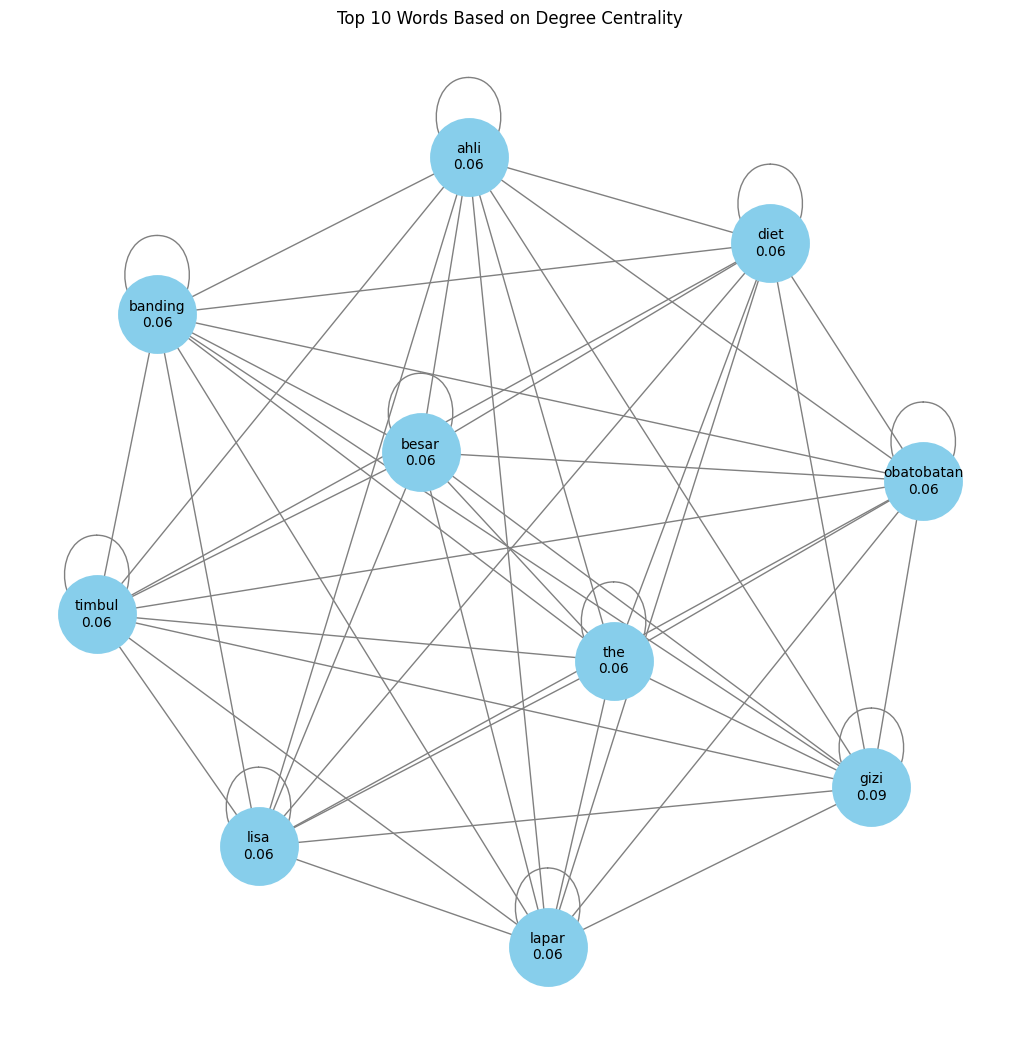

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengurutkan berdasarkan Degree Centrality dan mengambil 10 kata teratas
top_10_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)

# Buat subgraf dari 10 kata teratas
top_words = list(top_10_degree['Kata'])
subgraph = G.subgraph(top_words)

# Visualisasi subgraf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraph, k=0.5, iterations=50)  # Layout untuk posisi node yang lebih rapat

# Menggambar graf
nx.draw(subgraph, pos, with_labels=False, node_color='skyblue', node_size=3000, font_size=12,
        font_color='black', edge_color='gray', linewidths=2, font_weight='bold')

# Beri label pada node berdasarkan Degree Centrality
labels = {node: f"{node}\n{round(degree_centrality[node], 2)}" for node in subgraph.nodes()}

# Menggunakan draw_networkx_labels untuk menempatkan label di tengah node
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10, font_color='black', verticalalignment='center', horizontalalignment='center')

plt.title("Top 10 Words Based on Degree Centrality")
plt.show()


In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df

,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,ahli,0.000000,0.062780,0.092432
1,alami,0.004144,0.035874,0.108526
2,alas,0.015109,0.022422,0.107578
3,alir,0.011400,0.026906,0.114254
4,american,0.000000,0.040359,0.061022
...,...,...,...,...
219,utama,0.000202,0.022422,0.015944
220,vitamin,0.042306,0.026906,0.101833
221,wanita,0.000000,0.040359,0.061022
222,who,0.000000,0.040359,0.034495
